原始範例有錯誤，已修正

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

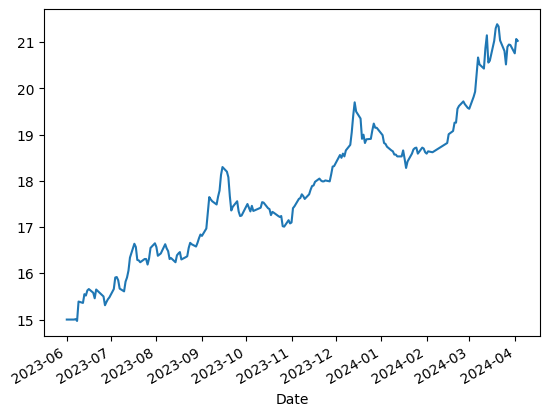

In [45]:

"""
取得海外ETF商品資料
"""

# 載入函數工具檔
import pandas as pd
import os
import yfinance as yf

def getDataYF(prod):
    # 備份文件的資料夾
    folder_name = "data"
    # 檢查資料夾是否存在
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # 1. 定義備份檔案名稱
    bakfile = os.path.join(folder_name, f"yf_{prod}.csv")
    # 2. 檢視是否有歷史資料(本地端)
    if os.path.exists(bakfile):
        yfdata = pd.read_csv(bakfile)
        yfdata["Date"] = pd.to_datetime(yfdata["Date"], format="%Y-%m-%d")
        yfdata.set_index("Date", inplace=True)
    else:
        # 最大範圍
        yfdata = yf.download(prod, period="max")
        # 也可以指定起迄日期
        # yfdata = yf.download(str(prod), start='2020-01-01', end='2024-03-31')
        yfdata.columns = [i.lower() for i in yfdata.columns]
        # 上網下載後 存到本地端
        yfdata.to_csv(bakfile)
    return yfdata

# 取得海外ETF商品標的
url = "https://www.moneydj.com/etf/x/rank/rank0004.xdjhtm?erank=mkt&eord=t150032"
web_data = pd.read_html(url)
ETF_info = web_data[1]
ETF_info_vanguard = ETF_info[ETF_info["ETF名稱"].str.contains("復華台灣科技優息")]
# 取得海外ETF資料
prod = ETF_info_vanguard.iloc[0]["代碼"]
# 在新版的用法中，股票代碼後面要加上國碼 '.TW'
prod += '.TW'
data = getDataYF(prod)
# 繪製海外ETF走勢圖
data["close"].plot()